## Classification practical

Total marks: 21

In [1]:
from keras.datasets import mnist      #importing libraries to have capabilities
import numpy as np
np.random.seed(1337)
import pandas
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from keras.utils import np_utils

## Load the dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()  #load available data online

11501568/11490434 [==============================] - 0s 0us/step


## View the shape

In [3]:
print('Training data shape : ', X_train.shape, Y_train.shape)   #shape of training data X and Y
print('Testing data shape : ', X_test.shape, Y_test.shape)    #shape of testing data X and Y

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


## Find the unique numbers from the train labels

In [4]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : 7')

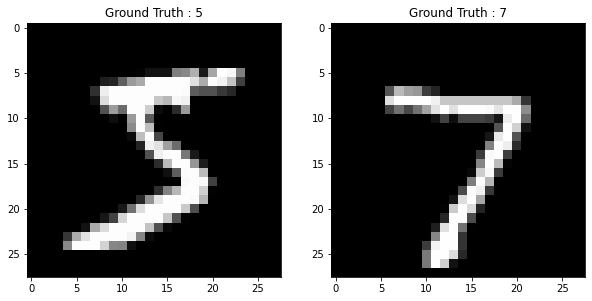

In [5]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## Flatten the data

In this notebook we won't be making use of the data as "images" but rather as long vectors of length 784

## This is what an example in the dataset looks like

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Task: Convert from image shape to a vector shape

We go from 28x28 pixel sized images to a vector of length 784.

We would like to reshape the training data from shape (60000, 28, 28) to (60000,784). To do this, we can make use of Numpy's *reshape* function. 

Hint: ...reshape(...).astype('float32')

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [10]:
X_train = np.reshape(X_train, (60000,784))
X_test = np.reshape(X_test, (10000,784))

## Now the data is a long vector

There are 60,000 examples for which each is a vector of length 784

In [11]:
X_train.shape

(60000, 784)

## View the first example

In [12]:
X_train[0].shape

(784,)

In [13]:
X_test.shape

(10000, 784)

In [14]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Task: Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be easier. To do this, we simply divide by the maximum value, in this case 255.

In [15]:
X_train =(X_train)/255  #normalise trained x values
X_test = (X_test)/255   #normalise test x values

## One hot encoding

We're going to want our labels as one-hot vectors, which are vectors that holds mostly 0's and one 1. It's easiest to see this in a example. As a one-hot vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

One-hot encoded vectors allow us to map each category in our set of labels to a vector where only a single value is 1.

0 maps to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1 maps to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

2 maps to [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

Notes on one-hot encoding: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## Before

In [16]:
Y_test[0]

7

## Task: Convert from categorical labels to one-hot encoded vectors

In this case there are 10 classes so we can tell the function to convert into a vector of length 10. You need to convert both the training targets and the testing targets.

In [17]:
Y_train=np_utils.to_categorical(Y_train)# Your code here
Y_test=np_utils.to_categorical(Y_test)

## After

In [18]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Task: Create a neural network model

In [19]:
# define the model
def baseline():
    # create model
    model = Sequential()
    
    # add one fully connected layer
    model.add(Dense(15, input_dim=784, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(13,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
    
    return model# Your code here

## Task: Initialise the model

In [20]:
model=baseline()# Nueral network model initialised

## Task: Determine the number of trainable parameters

In [21]:
model.summary()# summary of trainable parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 13)                208       
                                                                 
 dense_2 (Dense)             (None, 10)                140       
                                                                 
Total params: 12,123
Trainable params: 12,123
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_train.shape   # we check shape for consistency

(60000, 784)

In [23]:
Y_train.shape

(60000, 10)

In [24]:
X_test.shape

(10000, 784)

In [25]:
Y_test.shape

(10000, 10)

## Task: Begin training

Fit on the training features and targets. Also make use of the validation data you've set aside above. Set the number of epochs, batch size and also explore various *verbose* values.

In [26]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.3)# we split data into test, train and validation

In [27]:
history=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=20,batch_size=4,verbose=1)

Epoch 1/20
10500/10500 [==============================] - 25s 2ms/step - loss: 0.4108 - accuracy: 0.8764 - val_loss: 0.2939 - val_accuracy: 0.9150
Epoch 2/20
10500/10500 [==============================] - 22s 2ms/step - loss: 0.2449 - accuracy: 0.9289 - val_loss: 0.2319 - val_accuracy: 0.9321
Epoch 3/20
10500/10500 [==============================] - 23s 2ms/step - loss: 0.2145 - accuracy: 0.9358 - val_loss: 0.2233 - val_accuracy: 0.9367
Epoch 4/20
10500/10500 [==============================] - 23s 2ms/step - loss: 0.1945 - accuracy: 0.9425 - val_loss: 0.2228 - val_accuracy: 0.9387
Epoch 5/20
10500/10500 [==============================] - 23s 2ms/step - loss: 0.1811 - accuracy: 0.9468 - val_loss: 0.2144 - val_accuracy: 0.9398
Epoch 6/20
10500/10500 [==============================] - 23s 2ms/step - loss: 0.1720 - accuracy: 0.9488 - val_loss: 0.2172 - val_accuracy: 0.9401
Epoch 7/20
10500/10500 [==============================] - 23s 2ms/step - loss: 0.1632 - accuracy: 0.9524 - val_loss: 0

## Task: Predict on the test data

In [28]:
prediction=model.predict(X_test)# we make prediction using our trained model

In [29]:
prediction_classes=np.argmax(prediction,axis=1)

## Task: Compute the accuracy

In [30]:
accuracy_score(np.argmax(Y_test,1),prediction_classes)# we check error of our model

0.9478